# Problem Statements

#### 1. Regression: Tax Liability

The objective is to build a regression model that predicts the total tax liability for a given region based on key financial indicators such as number of returns, AGI, deductions, dependent exemptions, and taxable income.
This helps estimate how tax liability changes across different income groups and locations, enabling data-driven insights for fiscal planning.

#### 2. Clustering+Classification : Migration - Tax Change

It will helpful in tax liability to know increase or decrease due to migration .

# Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

### 1. Load and Inspect: Load the Residence_tax.csv dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Residence_tax.csv')

In [2]:
df.head()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,6
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,7
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,8
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,0.0,2.0,0.0,0.0,150,1
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,0.0,21.0,1.0,1.0,150,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23735 non-null  int64  
 1   Resident Type                                       23735 non-null  object 
 2   Place of Residence                                  23735 non-null  object 
 3   Country                                             23735 non-null  object 
 4   State                                               23735 non-null  object 
 5   County                                              23735 non-null  object 
 6   Income Class                                        23735 non-null  object 
 7   Disclosure                                          296 non-null    object 
 8   Number of All Returns                               23439 non-null  float64


In [4]:
df.isnull().sum()

Tax Year                                                  0
Resident Type                                             0
Place of Residence                                        0
Country                                                   0
State                                                     0
County                                                    0
Income Class                                              0
Disclosure                                            23439
Number of All Returns                                   296
NY AGI of All Returns (in thousands) *                  296
Deductions of All Returns (in thousands)                296
Dependent Exemptions of All Returns (in thousands)      296
Taxable Income of All Returns (in thousands)            296
Tax Before Credits of All Returns (in thousands)        296
Tax Liability of All Returns (in thousands) **          296
Place of Residence Sort Order                             0
Income Class Sort Order                 

### 2. Data Cleaning

In [5]:
df.drop("Disclosure", axis= 1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23735 non-null  int64  
 1   Resident Type                                       23735 non-null  object 
 2   Place of Residence                                  23735 non-null  object 
 3   Country                                             23735 non-null  object 
 4   State                                               23735 non-null  object 
 5   County                                              23735 non-null  object 
 6   Income Class                                        23735 non-null  object 
 7   Number of All Returns                               23439 non-null  float64
 8   NY AGI of All Returns (in thousands) *              23439 non-null  float64


In [7]:
df.dropna(inplace=True, axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23439 entries, 3 to 23734
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23439 non-null  int64  
 1   Resident Type                                       23439 non-null  object 
 2   Place of Residence                                  23439 non-null  object 
 3   Country                                             23439 non-null  object 
 4   State                                               23439 non-null  object 
 5   County                                              23439 non-null  object 
 6   Income Class                                        23439 non-null  object 
 7   Number of All Returns                               23439 non-null  float64
 8   NY AGI of All Returns (in thousands) *              23439 non-null  float64
 9   

### 3. Renaming Columns

In [9]:
df['Tax Liability of All Returns'] = df['Tax Liability of All Returns (in thousands) **']
df['NY AGI of All Returns']= df['NY AGI of All Returns (in thousands) *']
df['Dependent Exemptions of All Returns'] = df['Dependent Exemptions of All Returns (in thousands)']
df['Deductions of All Returns'] = df['Deductions of All Returns (in thousands)']
df['Taxable Income of All Returns'] = df['Taxable Income of All Returns (in thousands)']
df['Tax Before Credits of All Returns'] = df['Tax Before Credits of All Returns (in thousands)']

In [10]:
drop_duplicte_columns = [
    'Tax Liability of All Returns (in thousands) **',
    'NY AGI of All Returns (in thousands) *',
    'Dependent Exemptions of All Returns (in thousands)',
    'Deductions of All Returns (in thousands)',
    'Taxable Income of All Returns (in thousands)',
    'Tax Before Credits of All Returns (in thousands)'
]

df.drop(drop_duplicte_columns , axis = 1 , inplace = True)

In [11]:
format_data = ['All Other Countries +++',
       'Residence Unknown ++++', 'Grand Total, Full-Year Nonresident',
       'Grand Total, Part-Year Resident', 'All Other States','NYS Unclassified +','Residence Unknown ++',
       'All' , 'Not Applicable' , 'All - Excluding New Nork' , 'All Other States' , 
       'All Other Countries +++','Residence Unknown ++++' , 'Total']

columns_names = ['Place of Residence' , 'Country' , 'State' , 'Income Class']

for i in columns_names :
    print(f"{i} : {df[i].isin(format_data).sum()}")


Place of Residence : 1340
Country : 832
State : 1939
Income Class : 1816


In [12]:
place_to_drop = df[df["Place of Residence"].isin(format_data)].index
country_to_drop = df[df["Country"].isin(format_data)].index
state_to_drop = df[df["State"].isin(format_data)].index
income_to_drop = df[df["Income Class"].isin(format_data)].index

all_rows_to_drop = (
    place_to_drop
    .union(country_to_drop)
    .union(state_to_drop)
    .union(income_to_drop)
)
df.drop(all_rows_to_drop , inplace=True)

county_to_unk = df[df['County'].isin(format_data)].index
df['County'] = df['County'].replace(format_data , 'Unknown')


nyc_map = {
    "New York City - Richmond": "Richmond",
    "New York City - Kings": "Kings",
    "New York City - Queens": "Queens",
    "New York City - Bronx": "Bronx",
    "New York City - Manhattan": "Manhattan"
}

for col in ["Place of Residence", "County"]:
    df[col] = df[col].replace(nyc_map)

df["Place of Residence"] = df["Place of Residence"].str.strip()
df["Country"] = df["Country"].str.strip()
df["County"] = df["County"].str.strip()

In [13]:
df.shape

(19136, 16)

In [14]:
df.describe()

,Tax Year,Number of All Returns,Place of Residence Sort Order,Income Class Sort Order,Tax Liability of All Returns,NY AGI of All Returns,Dependent Exemptions of All Returns,Deductions of All Returns,Taxable Income of All Returns,Tax Before Credits of All Returns
count,19136.000000,1.913600e+04,19136.000000,19136.000000,1.913600e+04,1.913600e+04,19136.000000,1.913600e+04,1.913600e+04,1.913600e+04
mean,2007.167956,1.463579e+04,66.732912,6.561141,4.551925e+04,1.071581e+06,8108.414298,1.789528e+05,8.754314e+05,5.904082e+04
std,4.611798,8.020389e+04,47.274468,3.537004,4.479119e+05,7.298601e+06,46651.038935,9.343613e+05,6.622207e+06,4.893662e+05
min,1999.000000,1.000000e+01,1.000000,1.000000,-4.674790e+05,-1.262669e+07,0.000000,7.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,2.260000e+02,26.750000,4.000000,2.700000e+01,1.169025e+04,47.000000,3.227500e+03,4.881750e+03,2.390000e+02
50%,2008.000000,1.594500e+03,51.500000,7.000000,1.114000e+03,7.017700e+04,588.000000,1.855300e+04,4.456100e+04,2.357000e+03
75%,2011.000000,4.932250e+03,116.000000,10.000000,6.314250e+03,2.459650e+05,2481.250000,5.536400e+04,1.693080e+05,9.573750e+03
max,2014.000000,1.372544e+06,149.000000,13.000000,1.708919e+07,2.382972e+08,904387.000000,1.962783e+07,2.265283e+08,1.826171e+07


In [15]:
numeric_cols = [
    'NY AGI of All Returns',
    'Deductions of All Returns',
    'Dependent Exemptions of All Returns',
    'Taxable Income of All Returns',
    'Tax Before Credits of All Returns',
    'Tax Liability of All Returns',
]

### 4. Data Visulization & Outlier Detection

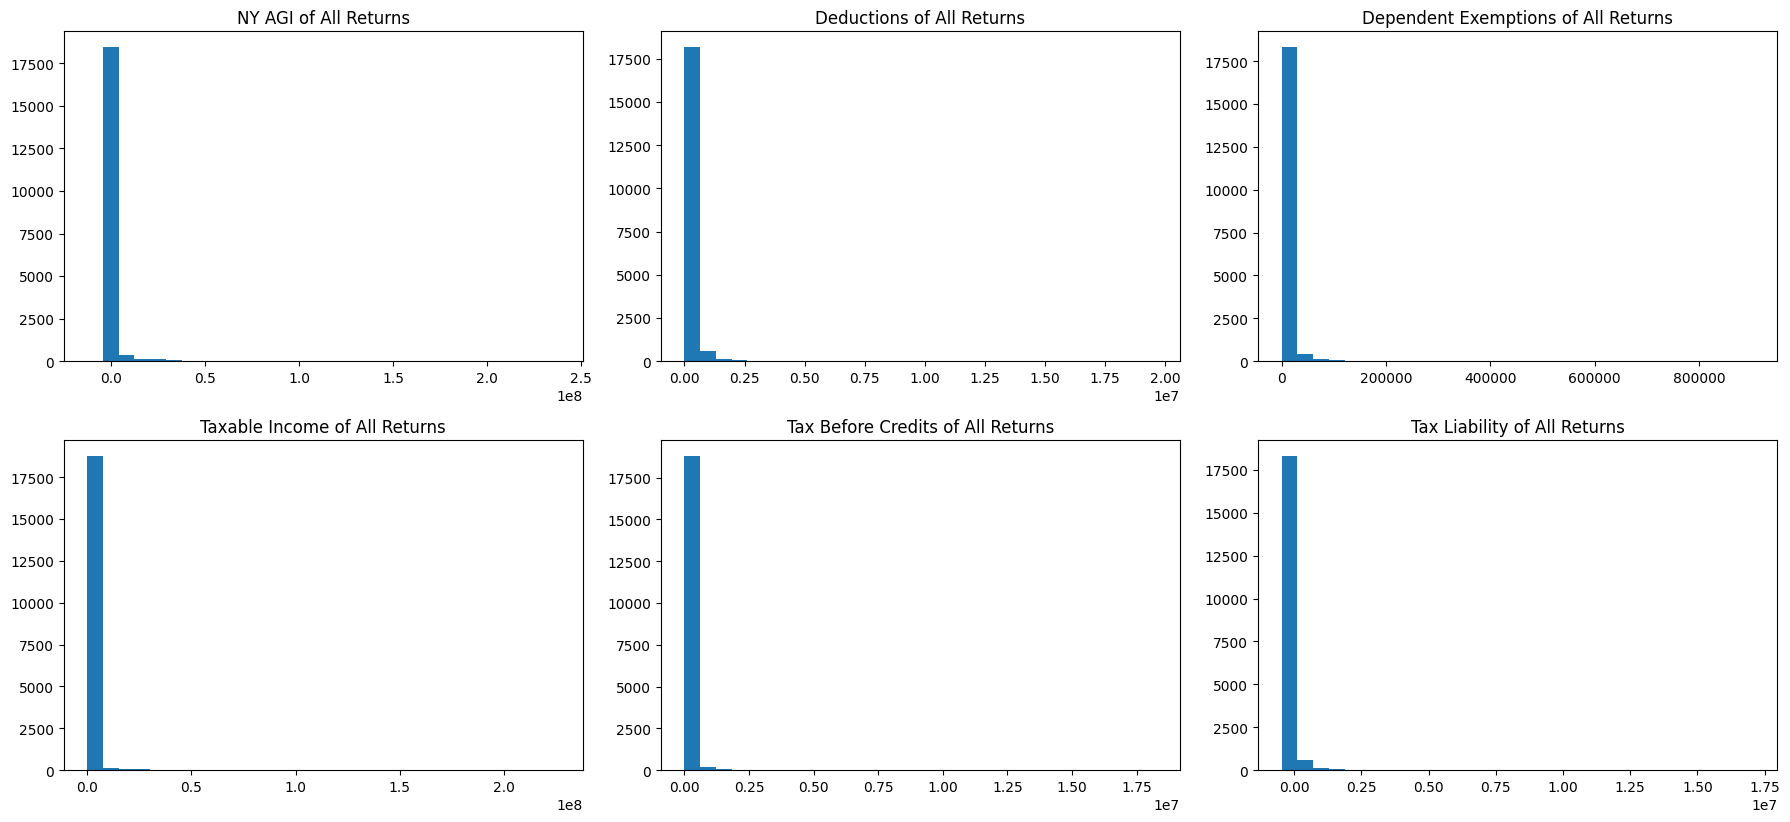

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  
    plt.hist(df[col].dropna(), bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

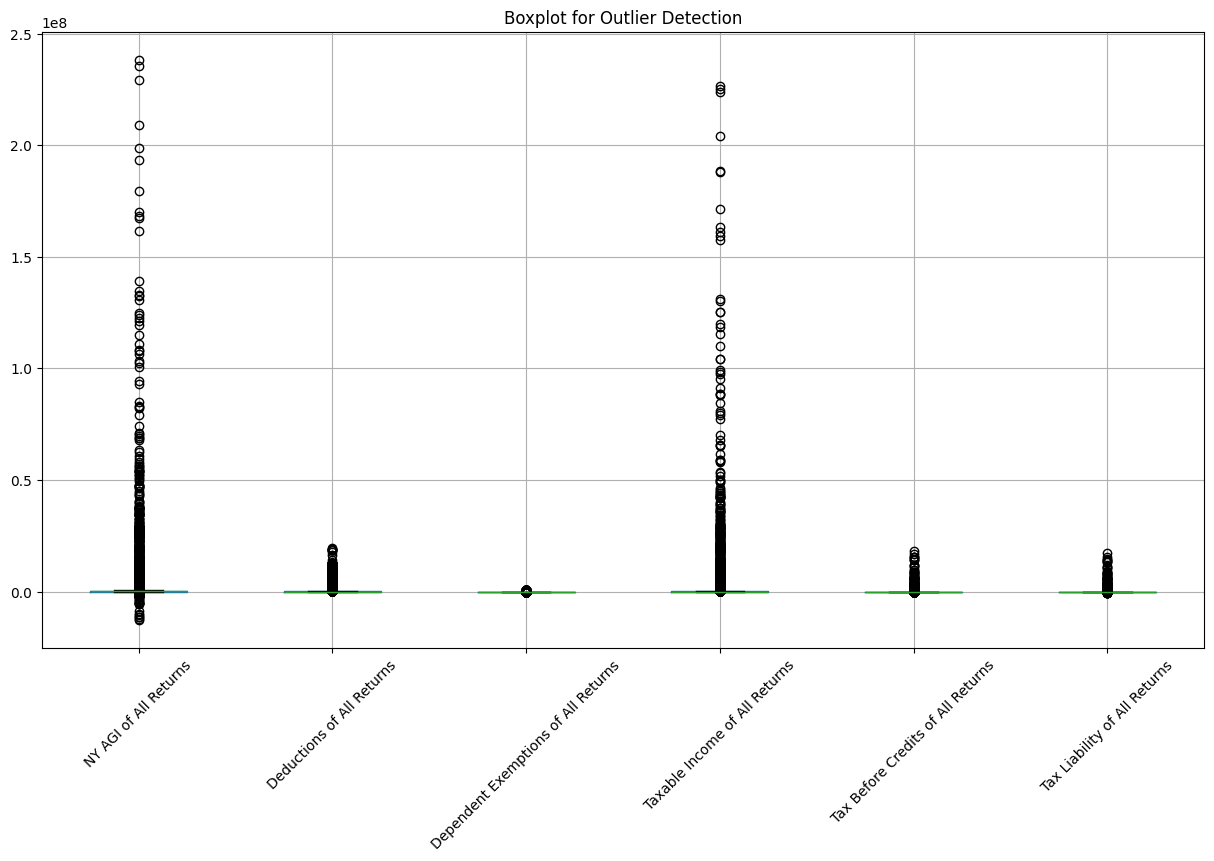

In [17]:
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

### 5. LOG-LOSE instead of Removing Outlliers 

- We are not removing the outliers because It is a real financial dataset and financial data has such types of values (rich countires , wealthy taxpayers). It will destroy the real distribution of tax data ,also our dataset is all about the taxes . So, For this we are using log_lose transformation cause it is highly longtailed data.

In [18]:
df_transformed=df.copy()
df_transformed[numeric_cols] = df_transformed[numeric_cols].apply(lambda x: np.log1p(x))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


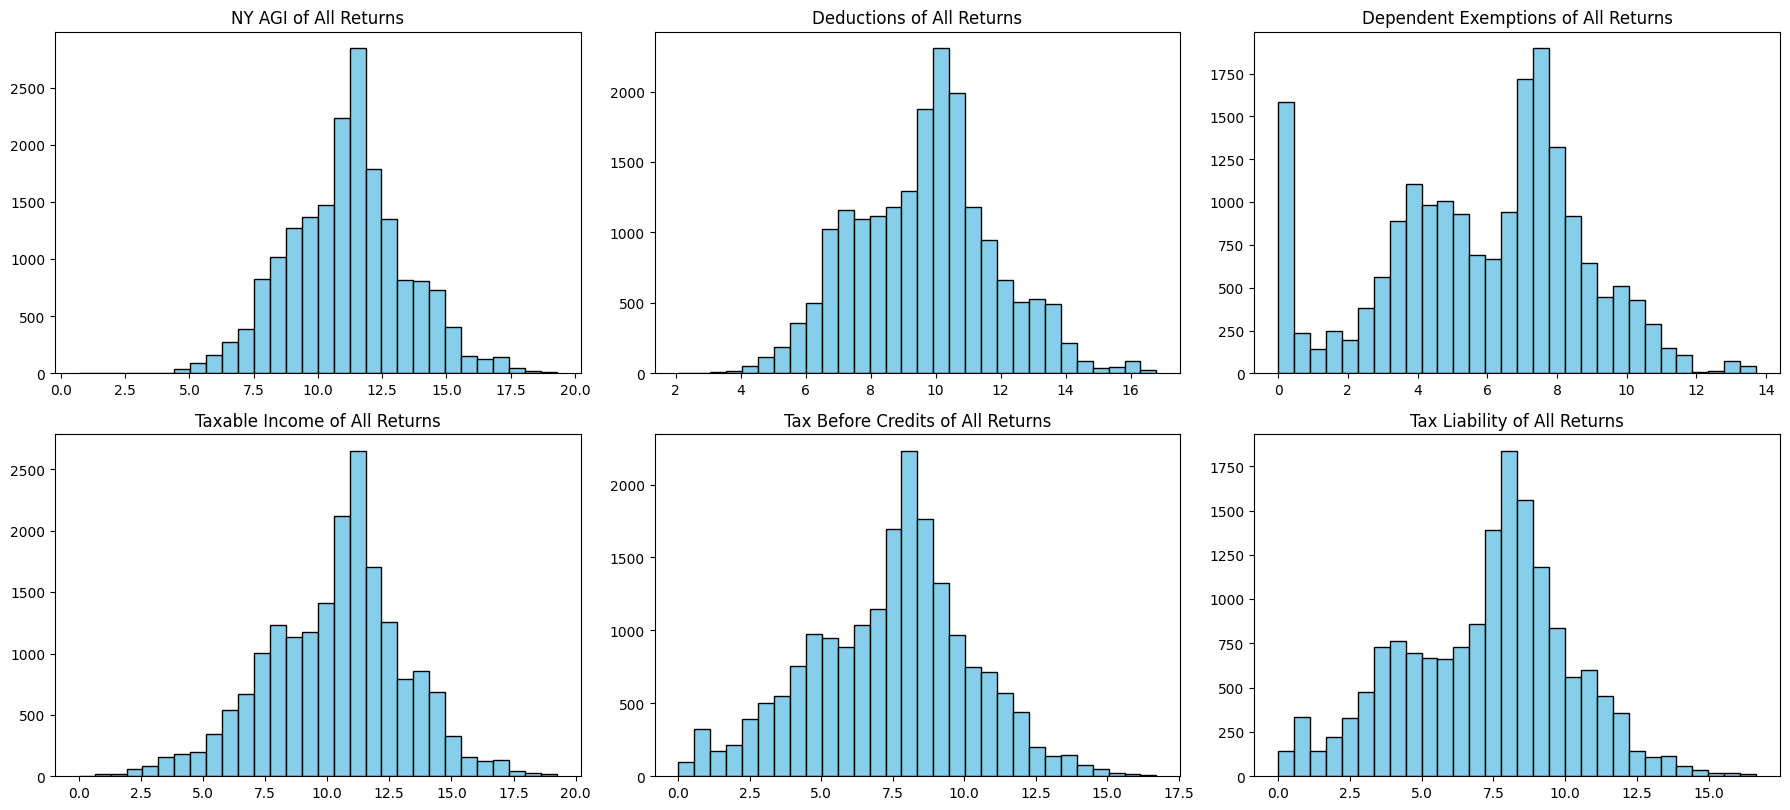

In [19]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)

    data = df_transformed[col].replace([np.inf, -np.inf], np.nan).dropna()

    if len(data) == 0:
        plt.title(col + " (No valid data)")
        continue
    
    plt.hist(data, bins=30, color="skyblue", edgecolor="black")
    plt.title(col)

plt.tight_layout()
plt.show()

##### Box Plot After Column Transformation

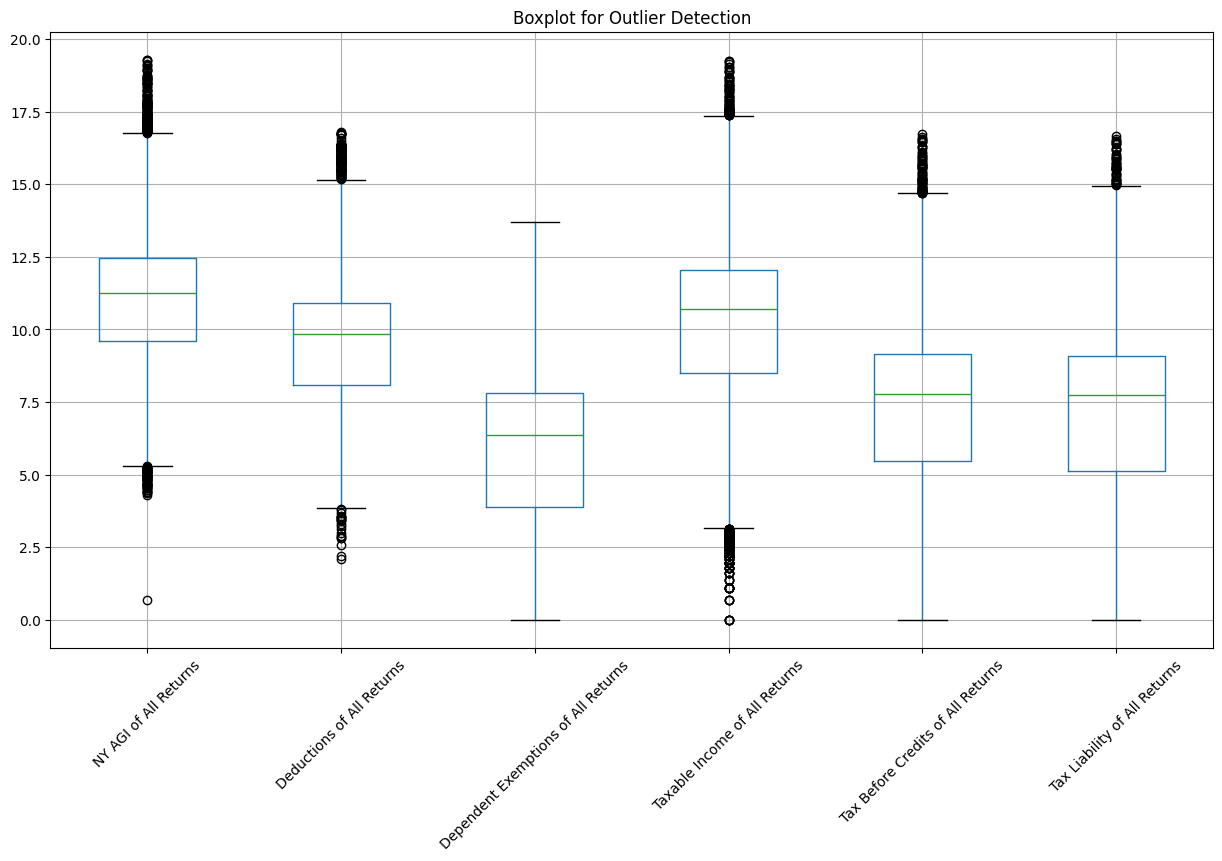

In [20]:
plt.figure(figsize=(15, 8))
df_transformed[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [21]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [22]:
df_transformed = remove_outliers(df_transformed, numeric_cols)
df_transformed.shape


(15445, 16)

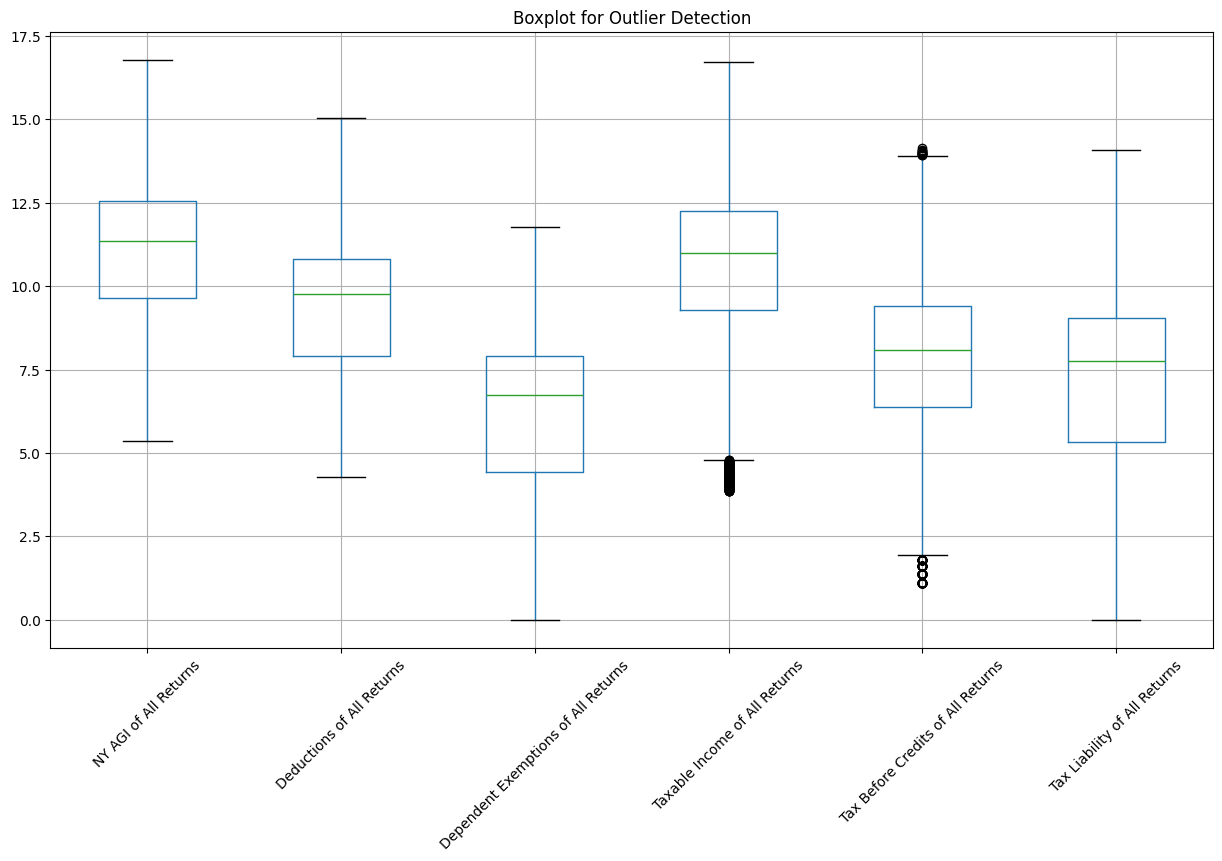

In [23]:
plt.figure(figsize=(15, 8))
df_transformed[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_transformed = df_transformed.copy()
df_transformed[numeric_cols] = np.expm1(df_transformed[numeric_cols])

In [25]:
df_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)

# Task 3: MODEL SELECTION

### - REGRESSION

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso

In [27]:
X=df_transformed.drop(['Tax Liability of All Returns','Country','County', 'Income Class'], axis=1)
y=df_transformed['Tax Liability of All Returns']

numeric_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### PreProcessing Pipeline

In [29]:
from sklearn.impute import SimpleImputer

numeric_transformer=Pipeline(steps=[
    ('scaler', StandardScaler())   
])

categorical_transformer=Pipeline(steps=[
  ('onhot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
  transformers=[
    ('num',numeric_transformer,numeric_columns),
    ('cat',categorical_transformer,categorical_columns)
  ]
)

In [30]:
model_and_parameters={
  "Ridge":{
    "model":Ridge(),
    "params":{"model__alpha":[0.1,1.0,10.0]}
  },
  "Lasso":
  {
    "model":Lasso(),
    "params":{"model__alpha": [0.001, 0.01, 0.1, 1, 10]}
  },
  "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [10, 15]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "model__learning_rate": [0.05, 0.1],
            "model__n_estimators": [100, 200]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "model__C": [1, 10],
            "model__gamma": ["scale", "auto"]
        }
    }
}


In [31]:
overfitting_results = {}
model_scores = {}

for model_name, model_param in model_and_parameters.items():
    print(model_name)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_param['model'])
    ])

    grid_search = GridSearchCV(
        pipeline,
        model_param['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    train_pred = best_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_r2 = r2_score(y_train, train_pred)

    test_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_r2 = r2_score(y_test, test_pred)

    print("Train RMSE:", train_rmse, " | Train R2:", train_r2)
    print("Test  RMSE:", test_rmse,  " | Test  R2:", test_r2)

    rmse_gap = test_rmse - train_rmse
    r2_gap = train_r2 - test_r2

    is_overfitting = (rmse_gap > 0.20 * test_rmse) or (r2_gap > 0.10)

    overfitting_results[model_name] = {
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Train_R2": train_r2,
        "Test_R2": test_r2,
        "RMSE_Gap": rmse_gap,
        "R2_Gap": r2_gap,
        "Overfitting": is_overfitting
    }

    model_scores[model_name] = {
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }


Ridge
Train RMSE: 18929.965750626263  | Train R2: 0.9254036022335829
Test  RMSE: 21825.51355887156  | Test  R2: 0.9152283816540651
Lasso


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+12, tolerance: 4.726e+09
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.901e+12, tolerance: 4.736e+09
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the 

Train RMSE: 18924.367621048706  | Train R2: 0.925447716265068
Test  RMSE: 21772.70215531246  | Test  R2: 0.9156381307054282
Random Forest
Train RMSE: 2378.1550039041244  | Train R2: 0.998822669174423
Test  RMSE: 5685.493855364336  | Test  R2: 0.9942474828761344
Gradient Boosting
Train RMSE: 2520.672270957436  | Train R2: 0.9986773316319396
Test  RMSE: 5926.115202650117  | Test  R2: 0.9937502634467963
SVR
Train RMSE: 70146.06918894457  | Train R2: -0.024294588221893676
Test  RMSE: 75986.24624826461  | Test  R2: -0.027522906982932138


### Checking Model is Overfitting or NOT

In [32]:
for model_name, result in overfitting_results.items():
    if result["Overfitting"]:
        print(f"{model_name} - Overfitting")
    else:
        print(f"{model_name} - NOT Overfitting")

Ridge - NOT Overfitting
Lasso - NOT Overfitting
Random Forest - Overfitting
Gradient Boosting - Overfitting
SVR - NOT Overfitting


### Which Model is Best

In [33]:
best_model_name = sorted(
    model_scores.items(),
    key=lambda x: (x[1]["Test_RMSE"], -x[1]["Test_R2"])
)[0][0]

print(f"Best Model : {best_model_name} ")

best_score = model_scores[best_model_name]
print(f"Test RMSE = {best_score['Test_RMSE']:.4f}")
print(f"Test R²   = {best_score['Test_R2']:.4f}")

Best Model : Random Forest 
Test RMSE = 5685.4939
Test R²   = 0.9942


In [34]:
test_predicted = best_model.predict(X_test)

In [36]:
results_df = pd.DataFrame(overfitting_results).T

/var/folders/dp/hrzpy61d7fj767t2tgp22ld40000gn/T/ipykernel_13527/2186592527.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(results_df.index, rotation=45)
/var/folders/dp/hrzpy61d7fj767t2tgp22ld40000gn/T/ipykernel_13527/2186592527.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(results_df.index, rotation=45)


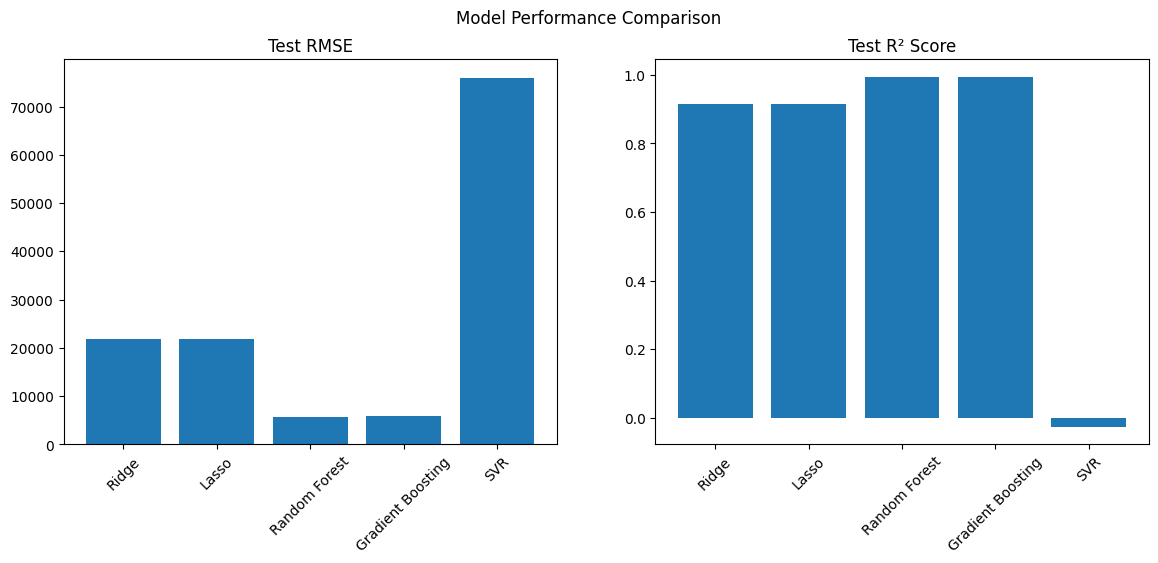

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# RMSE plot
ax[0].bar(results_df.index, results_df['Test_RMSE'])
ax[0].set_title("Test RMSE")
ax[0].set_xticklabels(results_df.index, rotation=45)

# R² plot
ax[1].bar(results_df.index, results_df['Test_R2'])
ax[1].set_title("Test R² Score")
ax[1].set_xticklabels(results_df.index, rotation=45)

plt.suptitle("Model Performance Comparison")
plt.show()


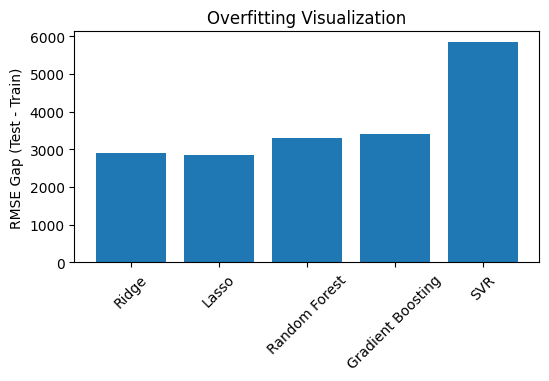

In [39]:
plt.figure(figsize=(6,3))
plt.bar(results_df.index, results_df['RMSE_Gap'])
plt.xticks(rotation=45)
plt.ylabel("RMSE Gap (Test - Train)")
plt.title("Overfitting Visualization")
plt.show()

Best model: Random Forest


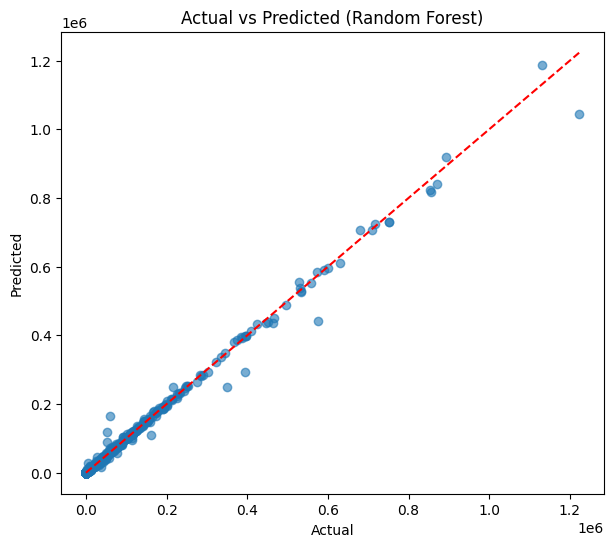

In [40]:
best_model_name = results_df['Test_RMSE'].idxmin()
print("Best model:", best_model_name)

# get best model again
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_and_parameters[best_model_name]['model'])
])

pipeline.fit(X_train, y_train)
test_predicted = pipeline.predict(X_test)

# plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, test_predicted, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+12, tolerance: 5.936e+09
  model = cd_fast.sparse_enet_coordinate_descent(


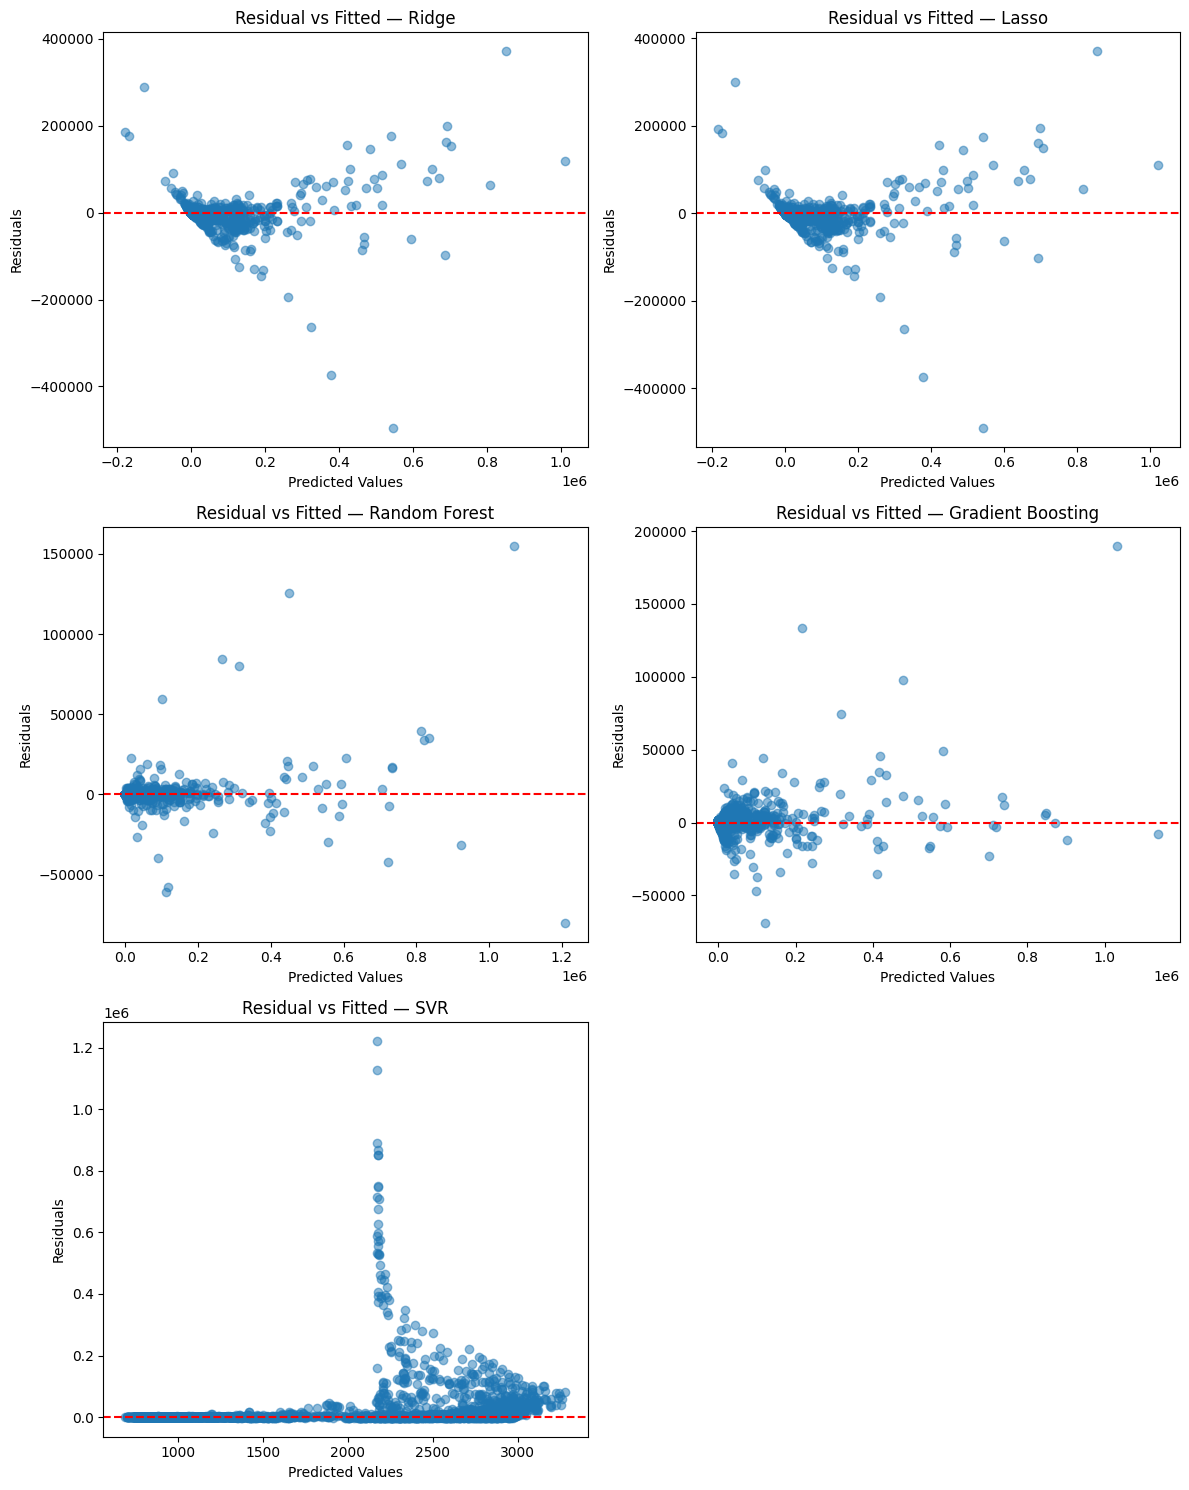

In [41]:
import math

model_count = len(overfitting_results)
cols = 2                                    
rows = math.ceil(model_count / cols)      

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(overfitting_results.items()):
    model = model_and_parameters[model_name]['model']
    pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)

    preds = pipe.predict(X_test)
    residuals = y_test - preds

    ax = axes[idx]
    ax.scatter(preds, residuals, alpha=0.5)
    ax.axhline(0, color="red", linestyle="--")
    ax.set_title(f"Residual vs Fitted — {model_name}")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## PLOTS:-

### 1. Test RMSE Bar Plot

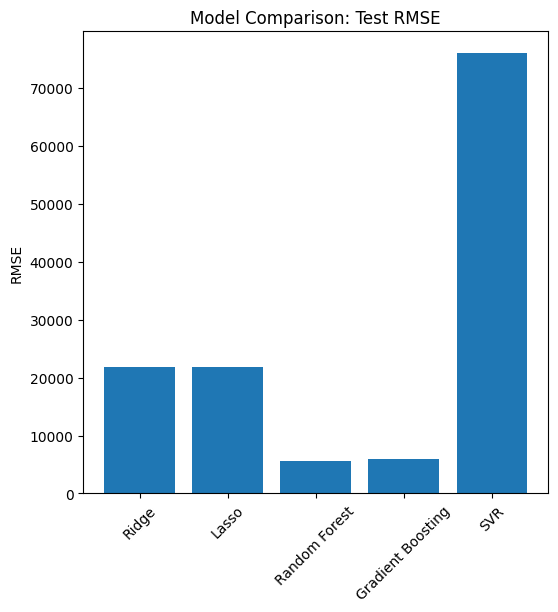

In [42]:
plt.figure(figsize=(6,6))
plt.bar(results_df.index, results_df["Test_RMSE"])
plt.title("Model Comparison: Test RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

### 2. Test R² Bar Plot

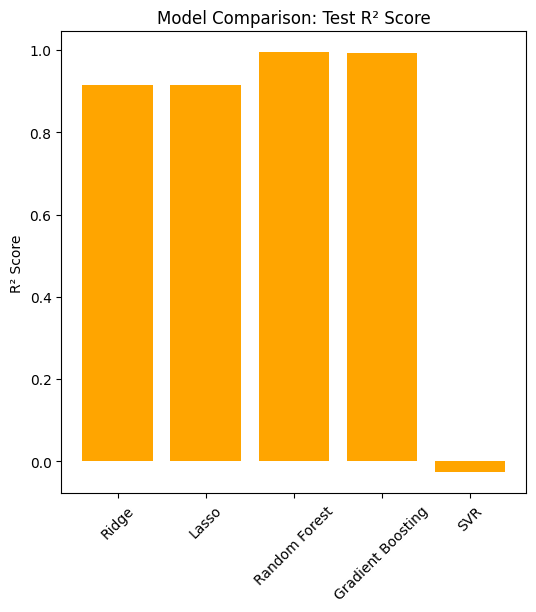

In [43]:
plt.figure(figsize=(6,6))
plt.bar(results_df.index, results_df["Test_R2"], color="orange")
plt.title("Model Comparison: Test R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

### 3. RMSE Gap (Overfitting Indicator)

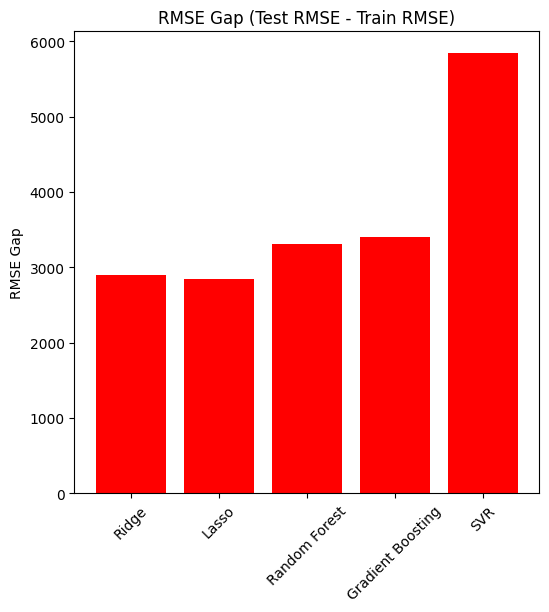

In [44]:
plt.figure(figsize=(6,6))
plt.bar(results_df.index, results_df["RMSE_Gap"], color="red")
plt.title("RMSE Gap (Test RMSE - Train RMSE)")
plt.ylabel("RMSE Gap")
plt.xticks(rotation=45)
plt.show()

In [45]:
best_model_name = results_df["Test_RMSE"].idxmin()
print("Best Model:", best_model_name)

Best Model: Random Forest


In [46]:
best_model = model_and_parameters[best_model_name]['model']
best_pipeline = Pipeline([('preprocessor', preprocessor),
                          ('model', best_model)])
best_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
best_pred = best_pipeline.predict(X_test)
best_residuals = y_test - best_pred

### 4. Actual vs Predicted Plot

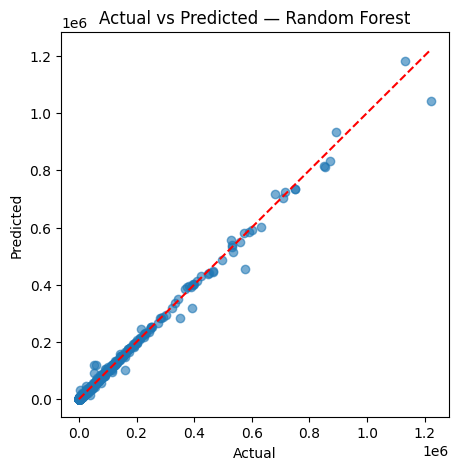

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title(f"Actual vs Predicted — {best_model_name}")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### 5. Residual Distribution

In [51]:
import seaborn as sns

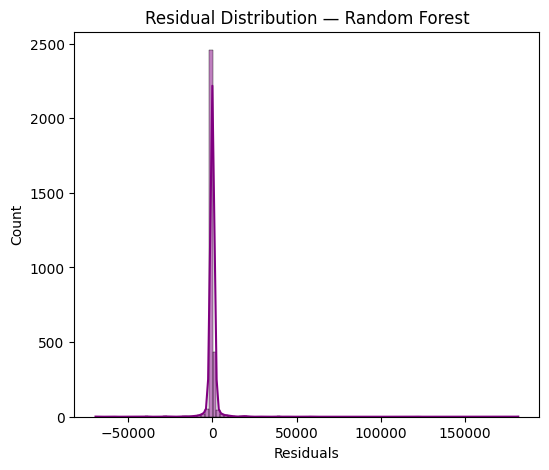

In [52]:
plt.figure(figsize=(6,5))
sns.histplot(best_residuals, kde=True, color="purple")
plt.title(f"Residual Distribution — {best_model_name}")
plt.xlabel("Residuals")
plt.show()

### 6. Residual vs Predicted (Fitted) Plot

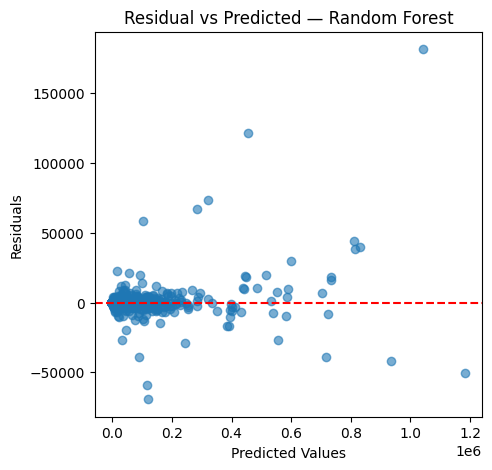

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(best_pred, best_residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title(f"Residual vs Predicted — {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### - CLUSTERING + CLASSIFICATION

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
clustering_features = [
    "Number of All Returns",
    "NY AGI of All Returns",
    "Deductions of All Returns",
    "Dependent Exemptions of All Returns",
    "Taxable Income of All Returns",
    "Tax Before Credits of All Returns",
    "Tax Liability of All Returns"
]

Features Used for Clustering

- Number of All Returns – volume of tax filings in each group

- NY AGI of All Returns – total Adjusted Gross Income

- Deductions of All Returns – total deductions claimed

- Dependent Exemptions of All Returns – dependency-related exemptions

- Taxable Income of All Returns – income subject to tax

- Tax Before Credits of All Returns – raw tax liability before credits

- Tax Liability of All Returns – final tax owed after credits

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

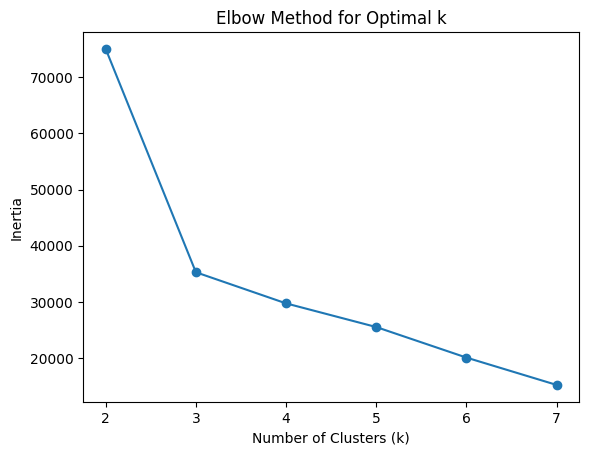

In [66]:
inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Cluster 0 — Low Income, Low Tax, Small Population Group

Cluster 1 — Super-High Income, Extreme Tax Liabilities (Ultra-Rich Group)

Cluster 2 — Medium Income, Moderate Tax (Middle-Class Cluster)

Cluster 3 — High Income but Volatile (Migrator/Business Cluster)

In [67]:
grp = df.groupby(["Place of Residence", "Income Class"])["Tax Year"].nunique().reset_index(name="n_years")
valid_keys = grp[grp["n_years"] >= 2][["Place of Residence", "Income Class"]]
df_filtered = df.merge(valid_keys.assign(_keep=1), on=["Place of Residence", "Income Class"],how="left")
df_filtered = df_filtered[df_filtered["_keep"] == 1].drop(columns=["_keep"])

- Group data by Place of Residence + Income Class

- Count how many distinct Tax Years each group has

- Keep only groups with 2+ years (needed for year-over-year comparison)

- Remove all single-year groups from the dataset

This ensures we can safely compute previous-year tax, tax change, and the binary increase flag, giving a clean and valid dataset for machine learning.

In [68]:
df_sorted = df_filtered.sort_values(["Place of Residence", "Income Class", "Tax Year"]).copy()
df_sorted["Prev_Tax_Liability"] = df_sorted.groupby(["Place of Residence", "Income Class"])["Tax Liability of All Returns"].shift(1)

The data is first sorted by
Place of Residence → Income Class → Tax Year
so each group appears in correct chronological order.

Within each group, shift(1) moves the tax values down by one row, creating a column that represents the previous year's tax liability.

The first year of each group gets NaN (no previous year),
and all other years correctly receive the tax from the year before.

This step prepares the data for computing the actual Tax Change value.

In [69]:
df_sorted["Tax_Change"] = (df_sorted["Tax Liability of All Returns"] - df_sorted["Prev_Tax_Liability"])
df_final = df_sorted.dropna(subset=["Prev_Tax_Liability"]).copy()
df_final["Tax_Increase_Flag"] = (df_final["Tax_Change"] > 0).astype(int)

Tax_Change is calculated as the difference between the current year’s tax and the previous year’s tax.

Rows where no previous-year tax exists (first year in each group) are removed.

Tax_Increase_Flag converts the change into a binary label:

1 = tax increased

0 = tax stayed the same or decreased

In [70]:
df_model = df_final.copy()
categorical_cols = ["Place of Residence", "Income Class", "Country", 'County', "State", "Resident Type"]

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

feature_columns = [
    "Place of Residence", "Income Class", "Country", "State",
    'County', "Resident Type", "Tax Year",
    "Number of All Returns", "NY AGI of All Returns",
    "Deductions of All Returns", "Dependent Exemptions of All Returns",
    "Taxable Income of All Returns", "Tax Before Credits of All Returns",
    "Prev_Tax_Liability"
]

X = df_model[feature_columns]
y = df_model["Tax_Increase_Flag"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [73]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nReport:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.5678206583427923

Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51      1678
           1       0.58      0.65      0.61      1846

    accuracy                           0.57      3524
   macro avg       0.57      0.56      0.56      3524
weighted avg       0.57      0.57      0.56      3524



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

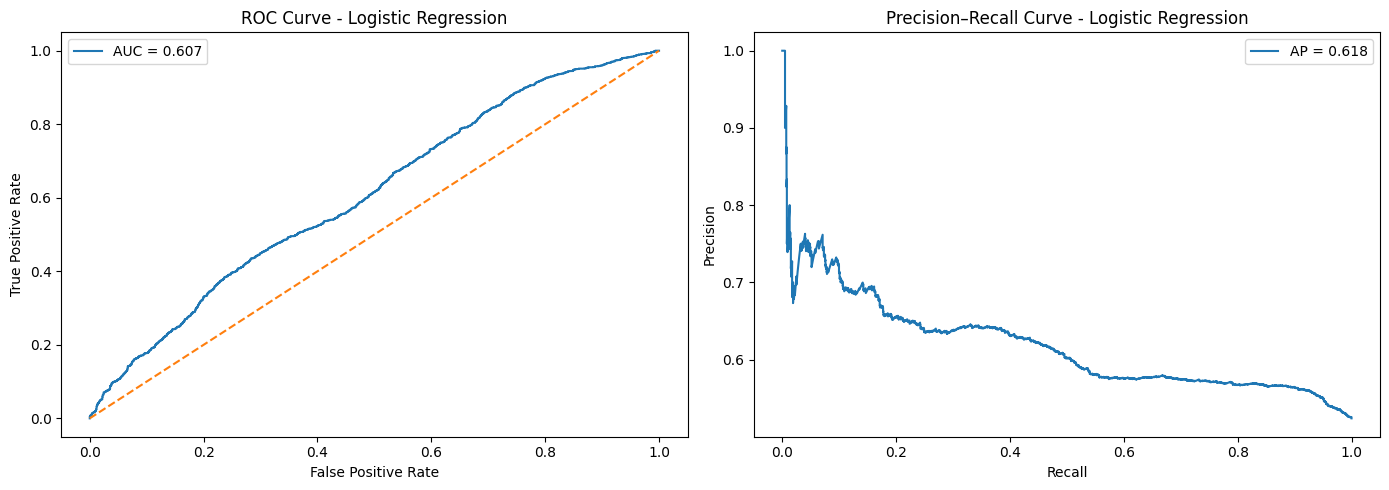

In [94]:
y_scores = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Logistic Regression")
axes[0].legend()

axes[1].plot(recall, precision, label=f"AP = {avg_precision:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision–Recall Curve - Logistic Regression")
axes[1].legend()

plt.tight_layout()
plt.show()

### Decision Tree

In [95]:
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nReport:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6912599318955732

Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68      1678
           1       0.71      0.68      0.70      1846

    accuracy                           0.69      3524
   macro avg       0.69      0.69      0.69      3524
weighted avg       0.69      0.69      0.69      3524



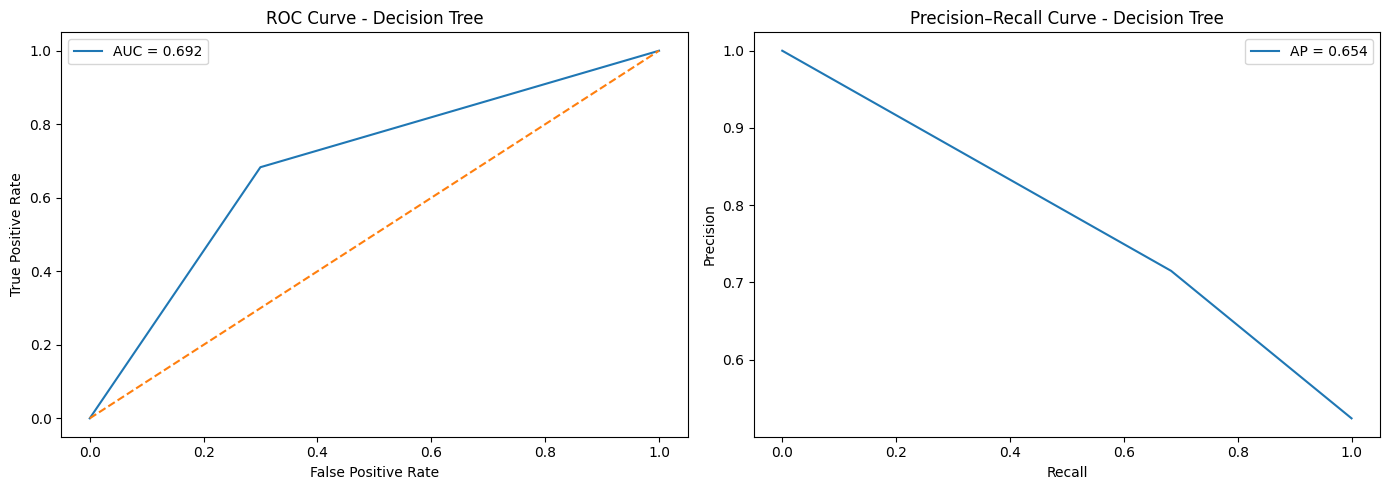

In [96]:
y_scores_dt = dt.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_scores_dt)
avg_precision_dt = average_precision_score(y_test, y_scores_dt)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_dt:.3f}")
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Decision Tree")
axes[0].legend()

axes[1].plot(recall_dt, precision_dt, label=f"AP = {avg_precision_dt:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision–Recall Curve - Decision Tree")
axes[1].legend()

plt.tight_layout()
plt.show()

### Random Forest Classifier

In [97]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nReport:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7392167990919409

Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1678
           1       0.75      0.75      0.75      1846

    accuracy                           0.74      3524
   macro avg       0.74      0.74      0.74      3524
weighted avg       0.74      0.74      0.74      3524



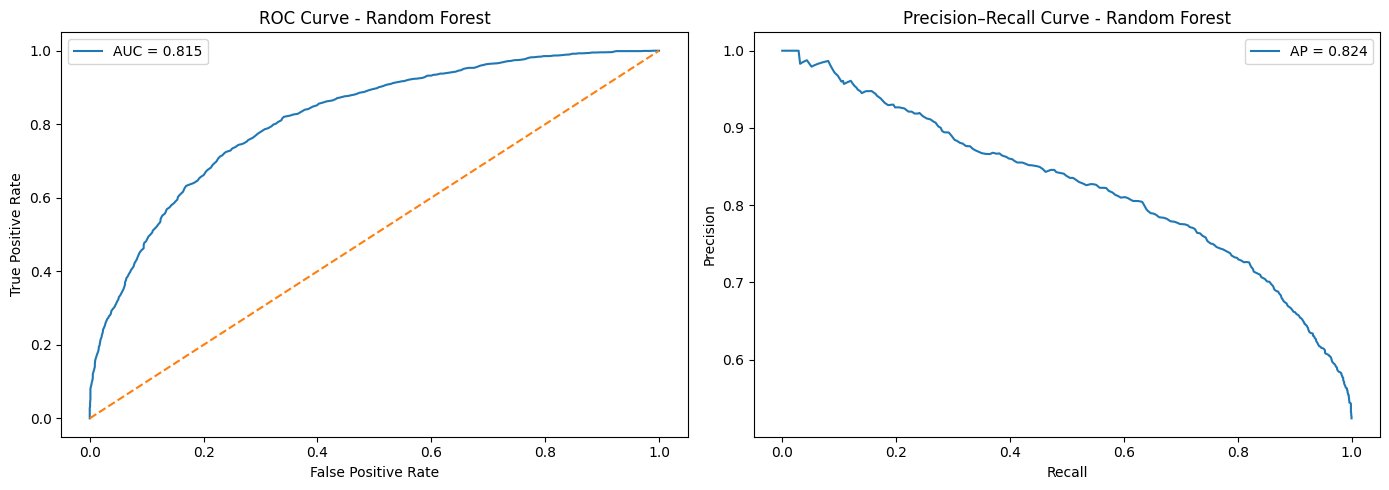

In [98]:
y_scores_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
avg_precision_rf = average_precision_score(y_test, y_scores_rf)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.3f}")
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Random Forest")
axes[0].legend()

axes[1].plot(recall_rf, precision_rf, label=f"AP = {avg_precision_rf:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision–Recall Curve - Random Forest")
axes[1].legend()

plt.tight_layout()
plt.show()


### XG Boost Classifier

In [99]:
xgb_basic = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

xgb_basic.fit(X_train, y_train)

y_pred_xgb = xgb_basic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nReport:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7814982973893303

Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1678
           1       0.79      0.79      0.79      1846

    accuracy                           0.78      3524
   macro avg       0.78      0.78      0.78      3524
weighted avg       0.78      0.78      0.78      3524



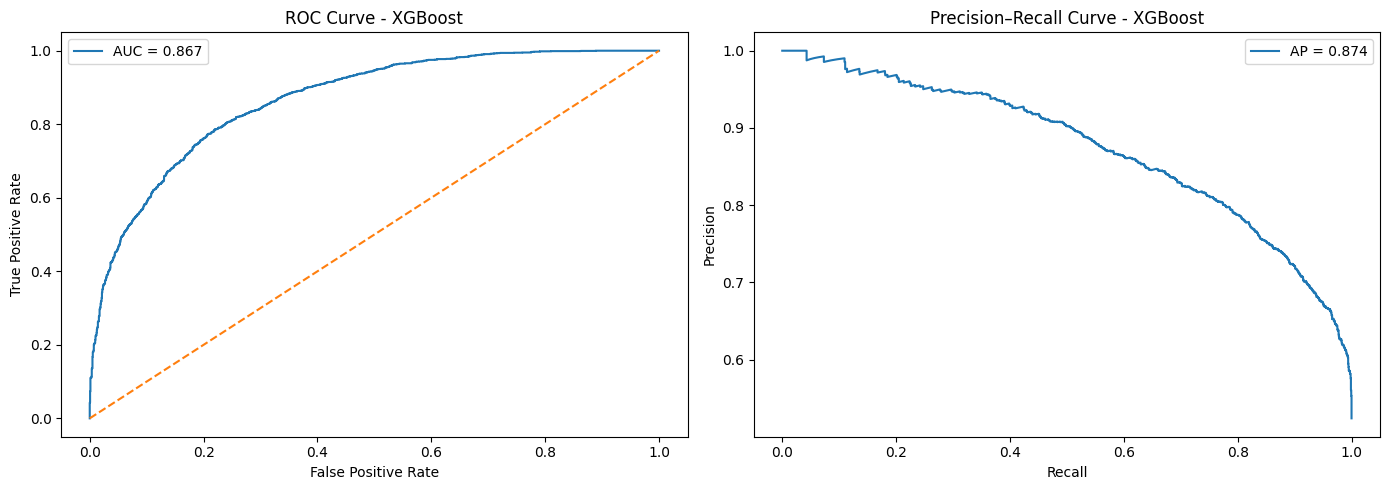

In [100]:
y_scores_xgb = xgb_basic.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores_xgb)
avg_precision_xgb = average_precision_score(y_test, y_scores_xgb)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.3f}")
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - XGBoost")
axes[0].legend()

axes[1].plot(recall_xgb, precision_xgb, label=f"AP = {avg_precision_xgb:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision–Recall Curve - XGBoost")
axes[1].legend()

plt.tight_layout()
plt.show()


### Hyperparameter Tuning for XGBoost

In [101]:
xgb_tuned = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=400,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_tuned.fit(X_train, y_train)

y_pred_tuned = xgb_tuned.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Tuned XGBoost Accuracy: 0.7812145289443814

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1678
           1       0.79      0.79      0.79      1846

    accuracy                           0.78      3524
   macro avg       0.78      0.78      0.78      3524
weighted avg       0.78      0.78      0.78      3524


Confusion Matrix:
 [[1297  381]
 [ 390 1456]]


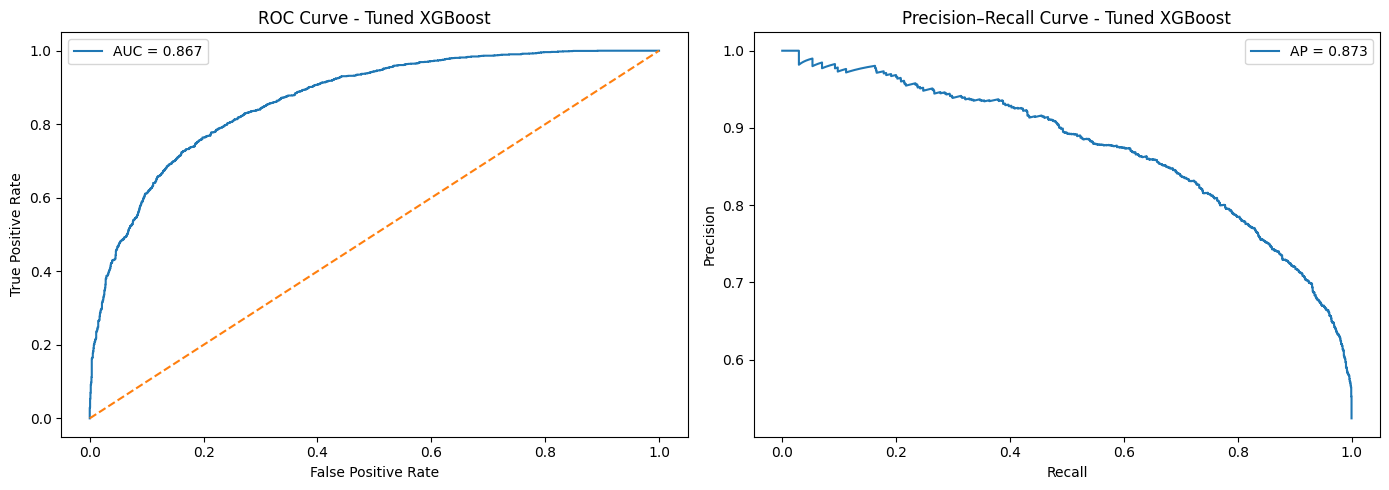

In [102]:
y_scores_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_scores_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_scores_tuned)
avg_precision_tuned = average_precision_score(y_test, y_scores_tuned)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr_tuned, tpr_tuned, label=f"AUC = {roc_auc_tuned:.3f}")
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Tuned XGBoost")
axes[0].legend()

axes[1].plot(recall_tuned, precision_tuned, label=f"AP = {avg_precision_tuned:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision–Recall Curve - Tuned XGBoost")
axes[1].legend()

plt.tight_layout()
plt.show()


### MODEL COMPARISON

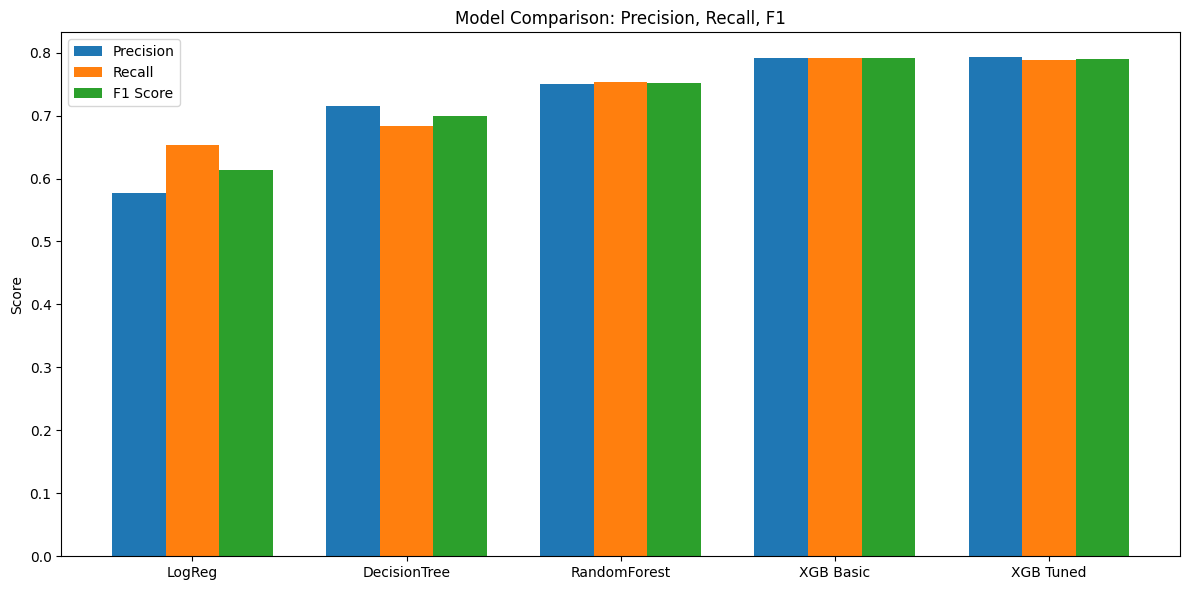

In [103]:
model_names = ["LogReg", "DecisionTree", "RandomForest", "XGB Basic", "XGB Tuned"]
preds = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_tuned]

precisions = [precision_score(y_test, p) for p in preds]
recalls = [recall_score(y_test, p) for p in preds]
f1s = [f1_score(y_test, p) for p in preds]

x = range(len(model_names))
width = 0.25

plt.figure(figsize=(12, 6))

plt.bar([i - width for i in x], precisions, width, label="Precision")
plt.bar(x, recalls, width, label="Recall")
plt.bar([i + width for i in x], f1s, width, label="F1 Score")

plt.xticks(x, model_names)
plt.ylabel("Score")
plt.title("Model Comparison: Precision, Recall, F1")
plt.legend()
plt.tight_layout()
plt.show()


### DIstribution of Tax Change

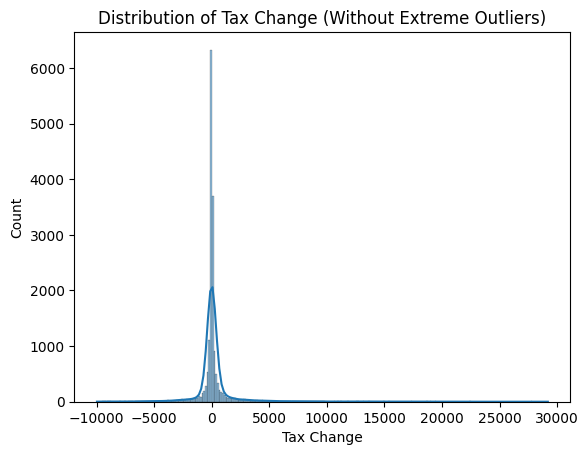

In [104]:
lower = np.percentile(df_final["Tax_Change"], 1)
upper = np.percentile(df_final["Tax_Change"], 99)

sns.histplot(
    df_final[(df_final["Tax_Change"] >= lower) & (df_final["Tax_Change"] <= upper)]["Tax_Change"],
    kde=True
)

plt.title("Distribution of Tax Change (Without Extreme Outliers)")
plt.xlabel("Tax Change")
plt.ylabel("Count")
plt.show()